In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from skimage import filters
import math
import sys

In [3]:
def show(img):
    plt.imshow(img, cmap="gray")
    plt.show()

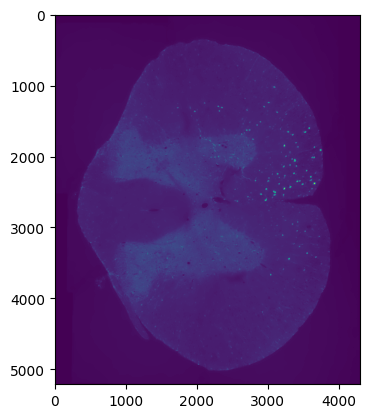

In [6]:
im = cv2.imread("stitched_2.jpg", 0)
sh = im.shape
plt.imshow(im)
plt.show()

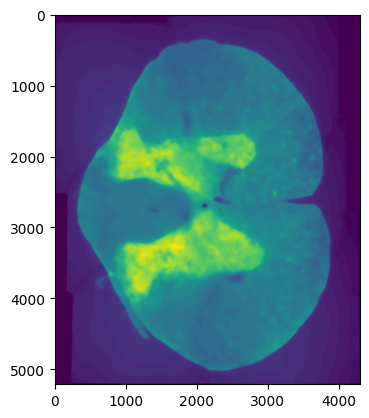

In [7]:
median = cv2.medianBlur(im,65)
plt.imshow(median)

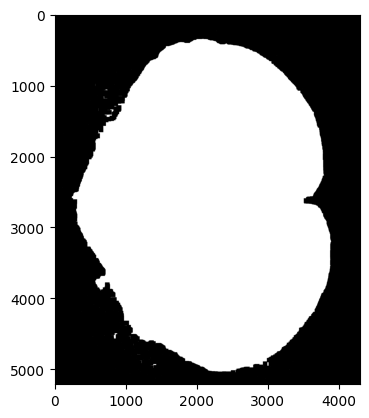

In [8]:
iniital_mask = im > 10
kernel2 = np.ones((60, 60), np.uint8)
iniital_mask = cv2.morphologyEx(iniital_mask.astype(np.uint8), cv2.MORPH_CLOSE, kernel2)
show(iniital_mask)

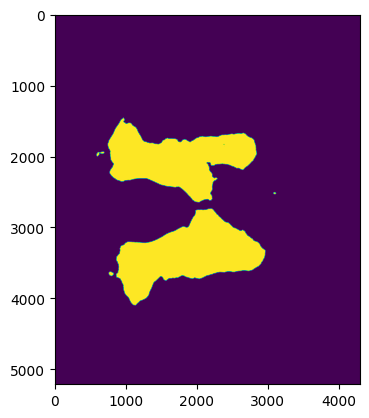

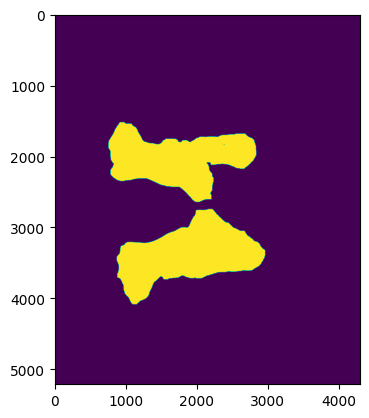

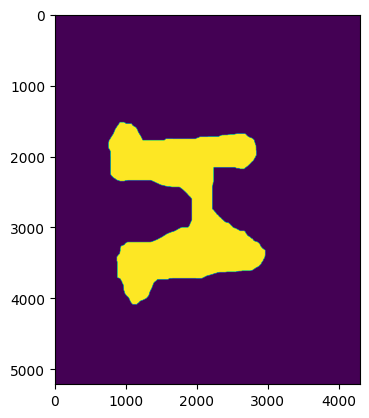

In [9]:
separated = median*iniital_mask
separated = separated[separated > 10]
th = filters.threshold_otsu(separated.flatten())

separated = median*iniital_mask
separated = separated>th

plt.imshow(separated)
plt.show()

kernel2 = np.ones((60, 60), np.uint8)
segmented_open = cv2.morphologyEx(separated.astype(np.uint8), cv2.MORPH_OPEN, kernel2)
plt.imshow(segmented_open)
plt.show()

kernel = np.ones((300,300),np.uint8)
segmented_closed = cv2.morphologyEx(segmented_open.astype(np.uint8), cv2.MORPH_CLOSE, kernel)

plt.imshow(segmented_closed)
plt.show()

In [ ]:
meds = ["C1-BJZ5.tiff","C2-BJZ5.tiff","C3-BJZ5.tiff","C4-BJZ5.tiff","C5-BJZ5.tiff","C6-BJZ5.tiff","C7-BJZ5.tiff","C8-BJZ5.tiff","T1-BJZ5.tiff"]

for i in meds:
    im = plt.imread("Representatives/" + i)[:,:,0]
    sh = im.shape
    median = cv2.medianBlur(im,65)
    iniital_mask = im > 10
    kernel2 = np.ones((60, 60), np.uint8)
    iniital_mask = cv2.morphologyEx(iniital_mask.astype(np.uint8), cv2.MORPH_CLOSE, kernel2)
    separated = median*iniital_mask
    separated = separated[separated > 10]
    th = filters.threshold_otsu(separated.flatten())

    separated = median*iniital_mask
    separated = separated>th

    kernel2 = np.ones((60, 60), np.uint8)
    segmented_open = cv2.morphologyEx(separated.astype(np.uint8), cv2.MORPH_OPEN, kernel2)

    kernel = np.ones((300,300),np.uint8)
    segmented_closed = cv2.morphologyEx(segmented_open.astype(np.uint8), cv2.MORPH_CLOSE, kernel)


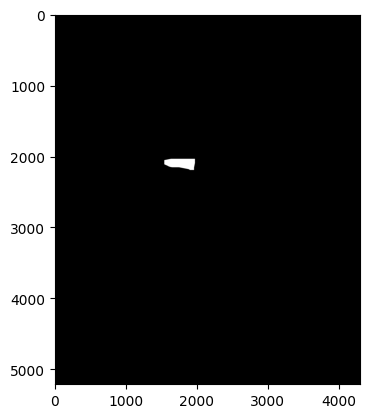

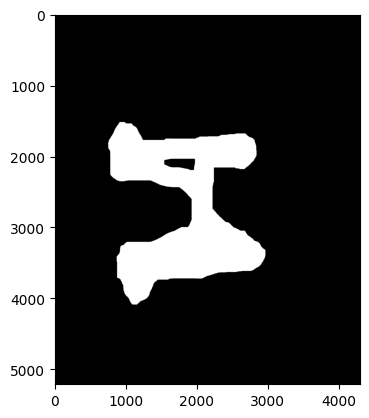

In [10]:
# noise removal
seg = segmented_closed*iniital_mask
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(seg,cv2.MORPH_OPEN,kernel, iterations = 2)
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
kernel2 = np.ones((30,30),np.uint8)
sure_fg = cv2.morphologyEx(sure_fg,cv2.MORPH_OPEN,kernel2, iterations = 2)

ret, markers = cv2.connectedComponents(sure_fg)

sure_fg_1 = markers==1
show(sure_fg_1)

unknown_1 = sure_fg_1 - sure_bg
show(unknown_1)

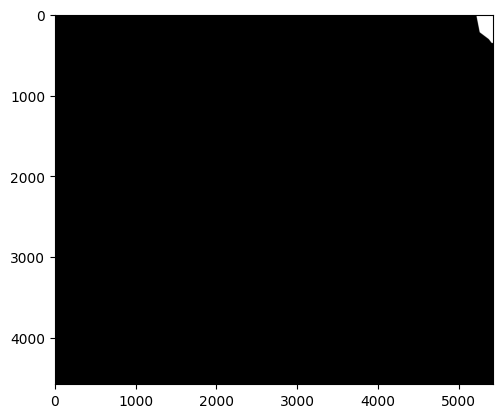

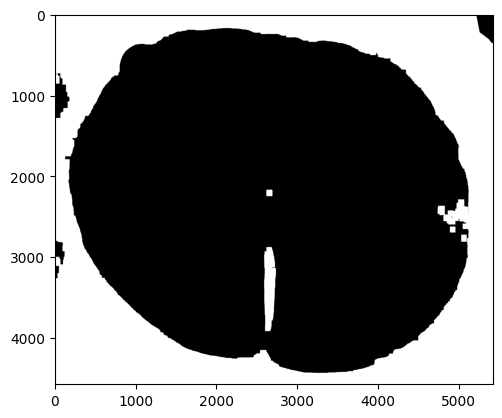

In [ ]:
# noise removal
seg = 1-iniital_mask
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(seg.astype(np.uint8),cv2.MORPH_OPEN,kernel, iterations = 2)
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
kernel2 = np.ones((30,30),np.uint8)
sure_fg = cv2.morphologyEx(sure_fg,cv2.MORPH_OPEN,kernel2, iterations = 2)

ret, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1

sure_fg_0 = markers==2
show(sure_fg_0)

unknown_0 = sure_fg_0 - sure_bg
show(unknown_0)

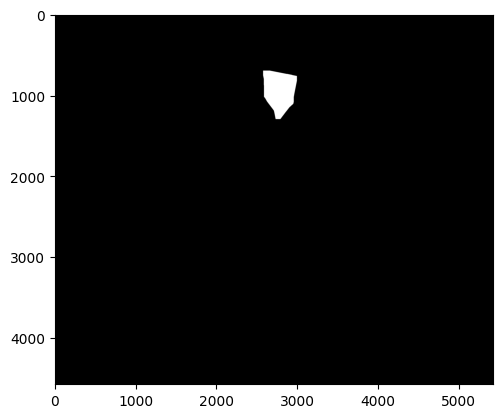

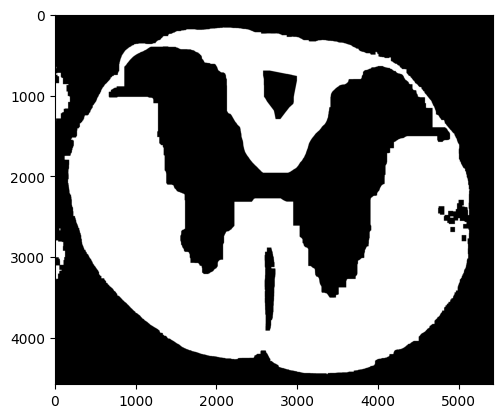

In [ ]:
# noise removal
seg = (1-segmented_closed)*iniital_mask
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(seg.astype(np.uint8),cv2.MORPH_OPEN,kernel, iterations = 2)
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
kernel2 = np.ones((30,30),np.uint8)
sure_fg = cv2.morphologyEx(sure_fg,cv2.MORPH_OPEN,kernel2, iterations = 2)

unknown = cv2.subtract(sure_bg, sure_fg)

ret, markers = cv2.connectedComponents(sure_fg)

sure_fg_2 = markers==1
show(sure_fg_2)

unknown_2 = sure_fg_2 - sure_bg
show(unknown_2)

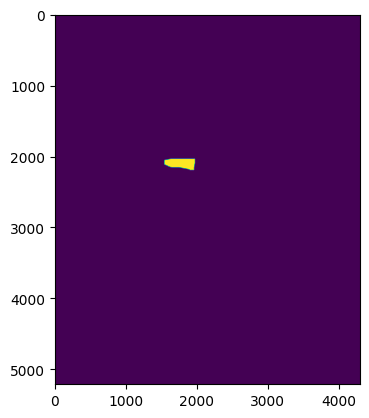

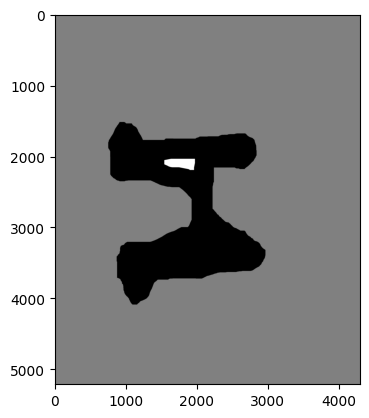

In [11]:
ret, markers = cv2.connectedComponents(sure_fg_1.astype(np.uint8))
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
plt.imshow(markers)
plt.show()
markers[unknown_1==255] = 0
show(markers)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


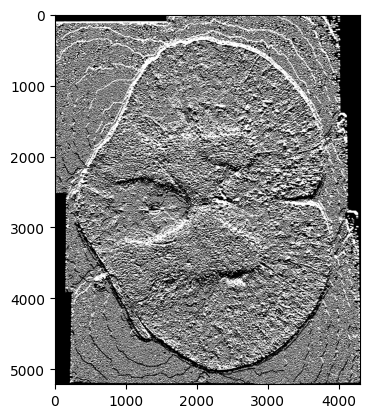

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


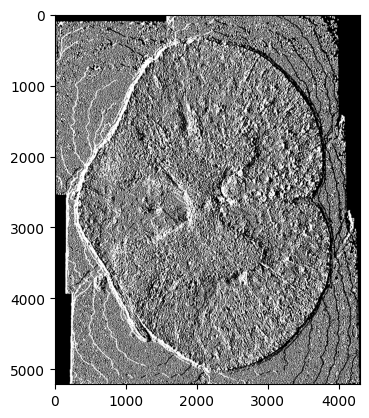

In [35]:
im = cv2.imread("stitched_2.jpg")
median = cv2.medianBlur(im,35)
sobelx = cv2.Sobel(im,cv2.CV_64F,0,1,ksize=31)
sobely = cv2.Sobel(im,cv2.CV_64F,1,0,ksize=31)
plt.imshow(sobelx)
plt.show()
plt.imshow(sobely)

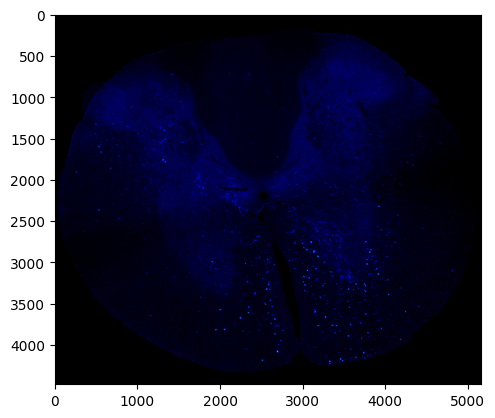

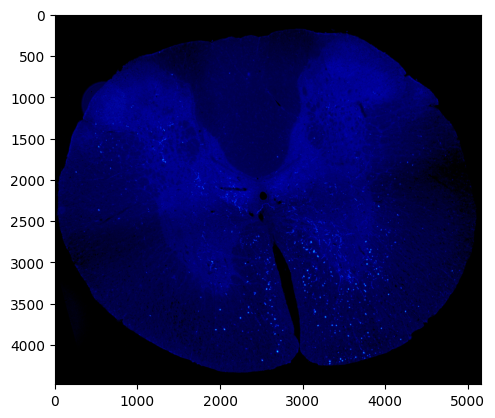

In [42]:

grad = cv2.Laplacian(median, cv2.CV_64F)

def apply_nonlinear_correction(image):
    float_image = image.astype(np.float32) / 255.0
    
    # Dividir la imagen en canales RGB
    r, g, b = cv2.split(float_image)
    
    # Aplicar corrección no lineal a cada canal
    corrected_r = np.sqrt(r)
    corrected_g = np.sqrt(g)
    corrected_b = np.sqrt(b)
    
    # Combinar los canales corregidos
    corrected_image = cv2.merge((corrected_r, corrected_g, corrected_b))
    
    # Convertir la imagen de vuelta a formato de 8 bits
    corrected_image = (corrected_image * 255).astype(np.uint8)
    
    return corrected_image

# Cargar imagen en escala de grises
gray_image = cv2.imread("Representatives/C1-BJZ5.tiff")

# Aplicar corrección no lineal
corrected_image = apply_nonlinear_correction(gray_image)

# Mostrar imagen original y corregida
plt.imshow(gray_image)
plt.show()
plt.imshow(corrected_image)

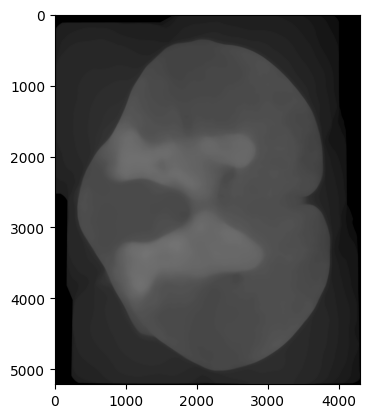

error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\segmentation.cpp:161: error: (-215:Assertion failed) src.type() == CV_8UC3 && dst.type() == CV_32SC1 in function 'cv::watershed'


In [37]:
im = cv2.imread("stitched_2.jpg")
median = cv2.medianBlur(corrected_image,205)
show(median)
markers = cv2.watershed(sobelx, markers)
show(markers)

C:\Users\oriol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


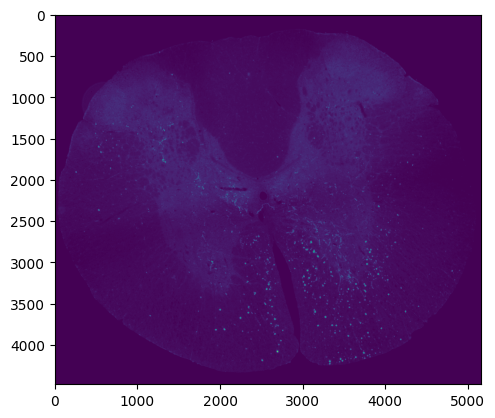

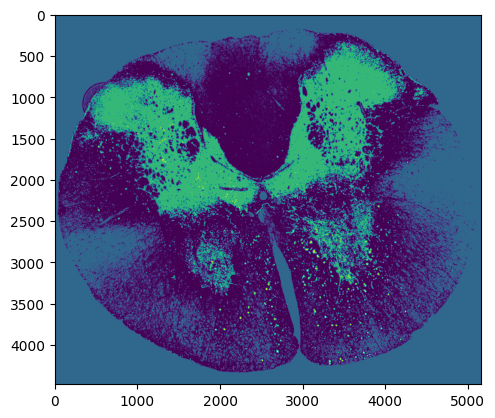

In [31]:
from sklearn.cluster import KMeans

def segment_image(image_path, num_clusters):
    # Cargar la imagen
    image = cv2.imread(image_path, 0)
    corrected_image = apply_nonlinear_correction(image)
    
    # Redimensionar la imagen para obtener una matriz 2D de píxeles
    pixels = corrected_image.reshape(-1, 1)

    # Aplicar el algoritmo K-means
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(pixels)
    
    # Asignar etiquetas a los píxeles
    labels = kmeans.labels_
    
    # Crear una imagen de segmentación a partir de las etiquetas
    segmented_image = labels.reshape(image.shape)
    
    return segmented_image

# Ruta de la imagen a segmentar
image_path = "Representatives/C1-BJZ5.tiff"

# Número de clusters (segmentos) deseados
num_clusters = 4

# Segmentar la imagen
segmented_image = segment_image(image_path, num_clusters)

# Mostrar la imagen original y la imagen segmentada
plt.imshow(cv2.imread(image_path, 0))
plt.show()
plt.imshow(segmented_image.astype(np.uint8) * (255 / (num_clusters - 1)))

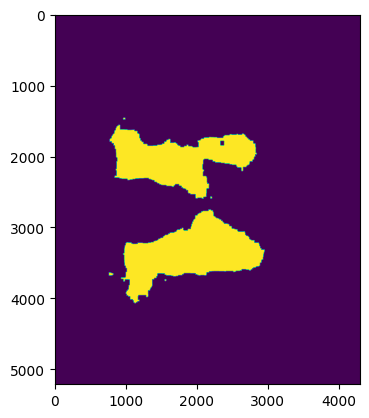

In [20]:
s_g = segmented_image==2

kernel = np.ones((20,20),np.uint8)
s_g_o = cv2.morphologyEx(s_g.astype(np.uint8), cv2.MORPH_OPEN, kernel)

kernel = np.ones((50,50),np.uint8)
s_g_c = cv2.morphologyEx(s_g_o.astype(np.uint8), cv2.MORPH_CLOSE, kernel)

plt.imshow(s_g_c)